In [1]:
# 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import os
%config Completer.use_jedi = False # jupyter autocomplete
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Setting directory
# Setting directory
os.chdir('/home/rahul/Documents/Personal/Python_practice')

#Get directory
os.getcwd()

'/home/rahul/Documents/Personal/Python_practice'

In [3]:
car= pd.read_csv('used_cars_data.csv')
car.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
# copy data
df=car.copy()

In [5]:
# shape of data
df.shape

(7253, 14)

In [6]:
df.describe()

,S.No.,Year,Kilometers_Driven,Seats,Price
count,7253.000000,7253.000000,7.253000e+03,7200.000000,6019.000000
mean,3626.000000,2013.365366,5.869906e+04,5.279722,9.479468
std,2093.905084,3.254421,8.442772e+04,0.811660,11.187917
min,0.000000,1996.000000,1.710000e+02,0.000000,0.440000
25%,1813.000000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3626.000000,2014.000000,5.341600e+04,5.000000,5.640000
75%,5439.000000,2016.000000,7.300000e+04,5.000000,9.950000
max,7252.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [7]:
# finding missing value
(df.isnull().sum()/df.shape[0])*100


S.No.                 0.000000
Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.027575
Engine                0.634220
Power                 0.634220
Seats                 0.730732
New_Price            86.129877
Price                17.013650
dtype: float64

In [8]:
# Removing useless column

df.drop('S.No.',axis=1,inplace=True)
df.head(1)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 736.8+ KB


## Feature Engineering

- It would be difficult to find the car’s age if it is in year format as the Age of the car is a contributing factor to Car Price. 

In [10]:
from datetime import date
current_yr=date.today().year
df['car_age']= current_yr-df['Year']


# Removing year
df.drop('Year',axis=1,inplace=True)

df.head(2)

,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,car_age
0,Maruti Wagon R LXI CNG,Mumbai,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,13
1,Hyundai Creta 1.6 CRDi SX Option,Pune,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,8


#### Let’s split the name and introduce new variables “Brand” and “Model”

In [11]:
df['Brand']=df['Name'].str.split().str.get(0)
df['Model']=df['Name'].str.split().str.get(1)+df['Name'].str.split().str.get(2)
df.head()

,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,car_age,Brand,Model
0,Maruti Wagon R LXI CNG,Mumbai,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,13,Maruti,WagonR
1,Hyundai Creta 1.6 CRDi SX Option,Pune,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,8,Hyundai,Creta1.6
2,Honda Jazz V,Chennai,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,12,Honda,JazzV
3,Maruti Ertiga VDI,Chennai,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,11,Maruti,ErtigaVDI
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,10,Audi,A4New


In [12]:
df.Model.nunique()

726

## Data Cleaning/Wrangling

In [13]:
df['Brand'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini', 'Hindustan', 'OpelCorsa'], dtype=object)

In [14]:
df['Brand']=df['Brand'].str.lower()
df['Model']=df['Model'].str.lower()

In [15]:
df.head()

,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,car_age,Brand,Model
0,Maruti Wagon R LXI CNG,Mumbai,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,13,maruti,wagonr
1,Hyundai Creta 1.6 CRDi SX Option,Pune,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,8,hyundai,creta1.6
2,Honda Jazz V,Chennai,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,12,honda,jazzv
3,Maruti Ertiga VDI,Chennai,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,11,maruti,ertigavdi
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,10,audi,a4new


In [16]:
# Taking 
df['Mileage']=df['Mileage'].str.split().str.get(0)
df['Engine']=df['Engine'].str.split().str.get(0)
df['Power']=df['Power'].str.split().str.get(0)

# Dropping columns
df.drop('New_Price',axis=1,inplace=True)
df.head(1)

,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,car_age,Brand,Model
0,Maruti Wagon R LXI CNG,Mumbai,72000,CNG,Manual,First,26.6,998,58.16,5.0,1.75,13,maruti,wagonr


In [17]:
df['Mileage']=df['Mileage'].astype(float)
df['Engine']=df['Engine'].astype(float)

df['Power'] = pd.to_numeric(df['Power'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Kilometers_Driven  7253 non-null   int64  
 3   Fuel_Type          7253 non-null   object 
 4   Transmission       7253 non-null   object 
 5   Owner_Type         7253 non-null   object 
 6   Mileage            7251 non-null   float64
 7   Engine             7207 non-null   float64
 8   Power              7078 non-null   float64
 9   Seats              7200 non-null   float64
 10  Price              6019 non-null   float64
 11  car_age            7253 non-null   int64  
 12  Brand              7253 non-null   object 
 13  Model              7252 non-null   object 
dtypes: float64(5), int64(2), object(7)
memory usage: 793.4+ KB


In [18]:
df['Power'].replace(np.nan,df['Power'][df['Transmission']=='Manual'].mean(),inplace=True)
df['Power'].replace(np.nan,df['Power'][df['Transmission']=='Automatic'].mean(),inplace=True)


df['Mileage'].replace(np.nan,df['Mileage'][df['Transmission']=='Manual'].mean(),inplace=True)
df['Mileage'].replace(np.nan,df['Mileage'][df['Transmission']=='Automatic'].mean(),inplace=True)

df['Engine'].replace(np.nan,df['Engine'][df['Transmission']=='Manual'].mean(),inplace=True)
df['Engine'].replace(np.nan,df['Engine'][df['Transmission']=='Automatic'].mean(),inplace=True)

df['Seats'].replace(np.nan,df['Seats'].mode()[0],inplace=True)

In [19]:
#
df.drop('Name',axis=1,inplace=True)

### Making Categorical and numerical columns


In [20]:
df.select_dtypes(include='object')

,Location,Fuel_Type,Transmission,Owner_Type,Brand,Model
0,Mumbai,CNG,Manual,First,maruti,wagonr
1,Pune,Diesel,Manual,First,hyundai,creta1.6
2,Chennai,Petrol,Manual,First,honda,jazzv
3,Chennai,Diesel,Manual,First,maruti,ertigavdi
4,Coimbatore,Diesel,Automatic,Second,audi,a4new
...,...,...,...,...,...,...
7248,Hyderabad,Diesel,Manual,First,volkswagen,ventodiesel
7249,Mumbai,Petrol,Automatic,First,volkswagen,pologt
7250,Kolkata,Diesel,Manual,First,nissan,micradiesel
7251,Pune,Petrol,Automatic,Third,volkswagen,pologt


In [21]:
cat_cols=df.select_dtypes(include='object').columns
num_cols=df.select_dtypes(include=np.number).columns
num_cols

Index(['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price',
       'car_age'],
      dtype='object')

## UNivariate analysis

- Univariate analysis can be done for both Categorical and Numerical variables.

- Categorical variables can be visualized using a Count plot, Bar Chart, Pie Plot, etc.

- Numerical Variables can be visualized using Histogram, Box Plot, Density Plot, etc.

Kilometers_Driven
Skew : 61.58


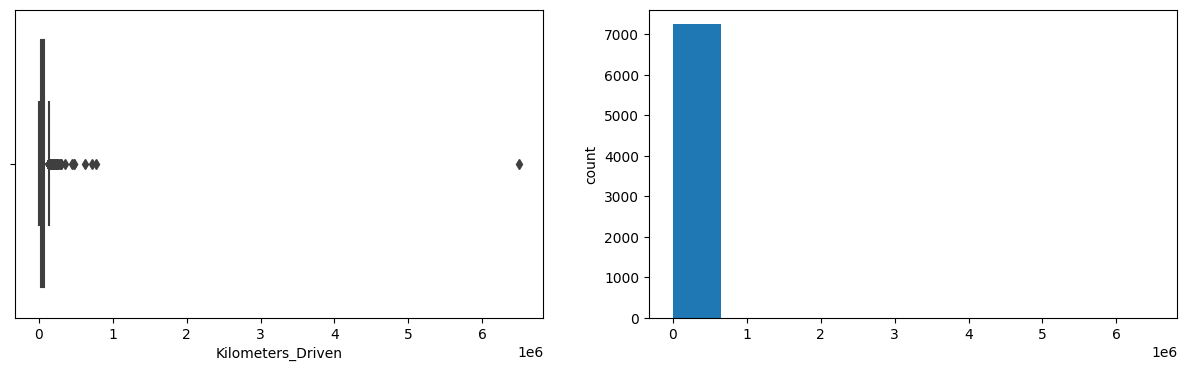

Mileage
Skew : -0.44


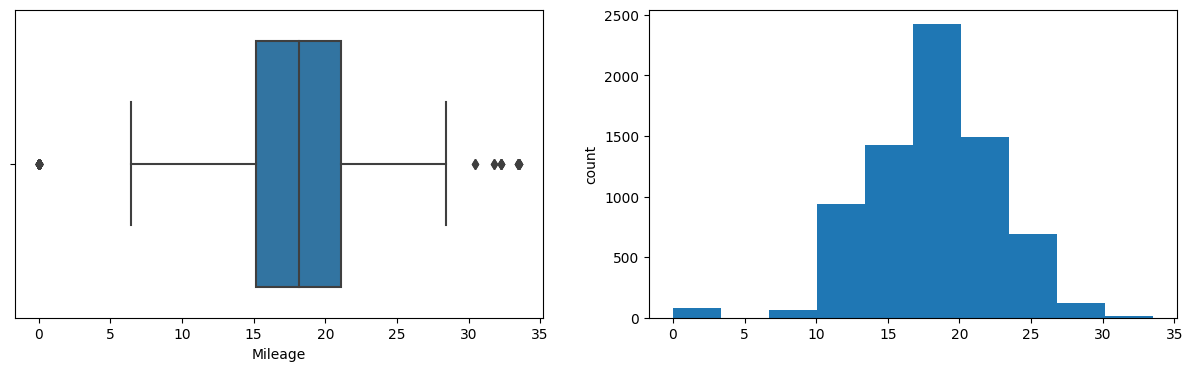

Engine
Skew : 1.42


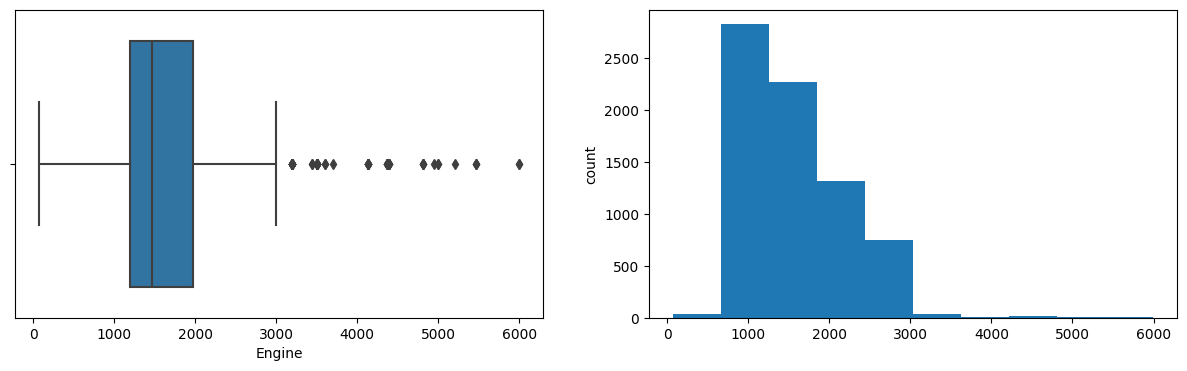

Power
Skew : 2.0


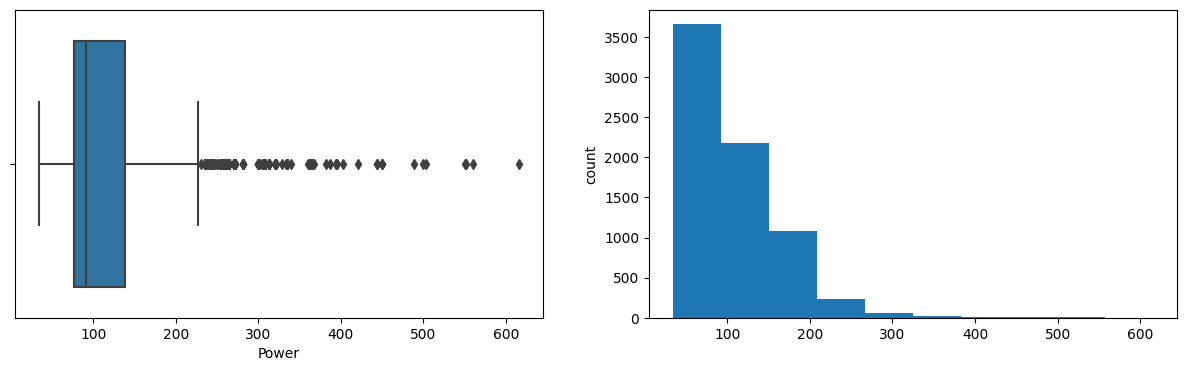

Seats
Skew : 1.91


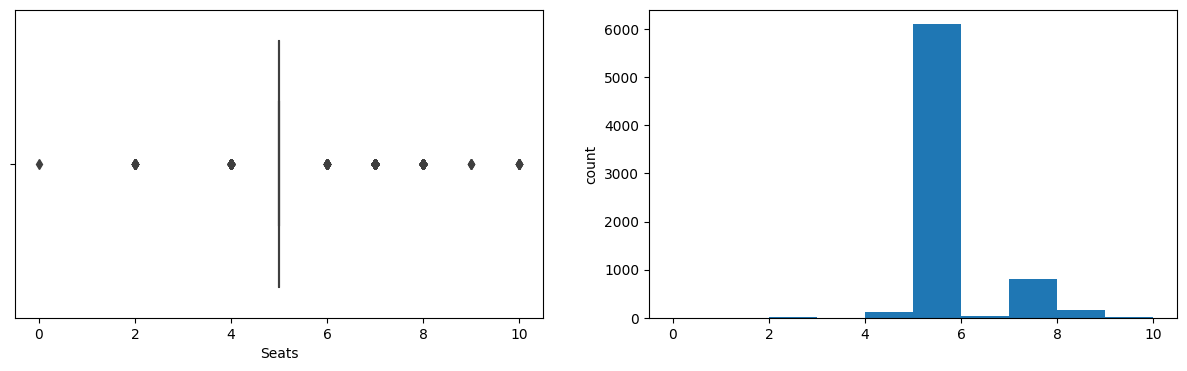

Price
Skew : 3.34


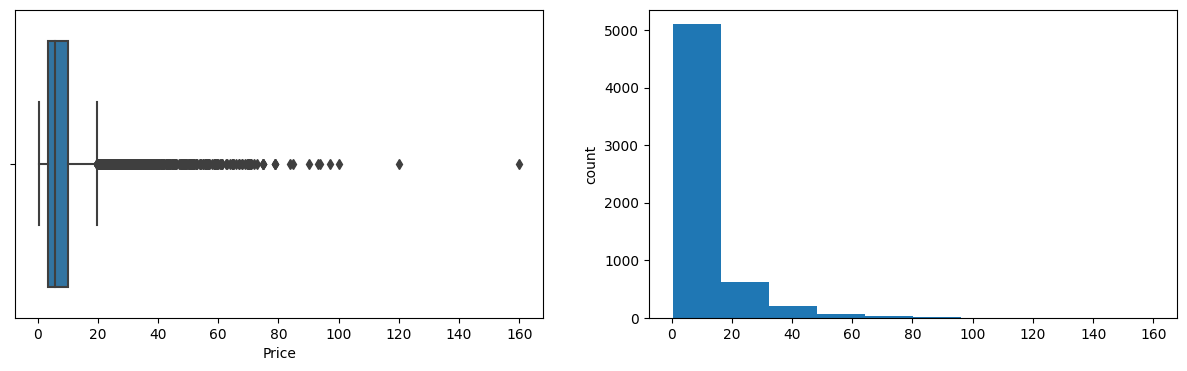

car_age
Skew : 0.84


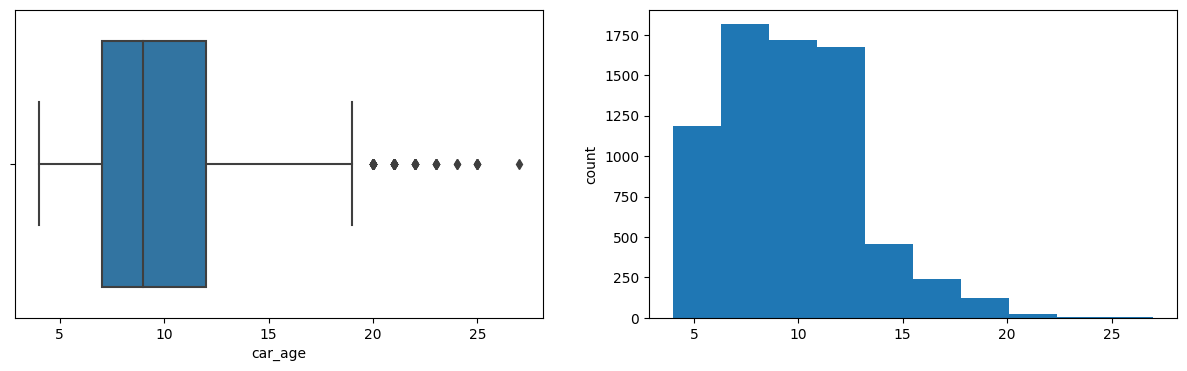

In [22]:
for col in num_cols:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2,2)
    df[col].hist(grid=False)
    #sns.histplot(df[col])
    plt.ylabel('count')
    plt.subplot(1, 2, 1)
    sns.boxplot(x=df[col])
    plt.show()

In [23]:
cat_cols

Index(['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Brand',
       'Model'],
      dtype='object')

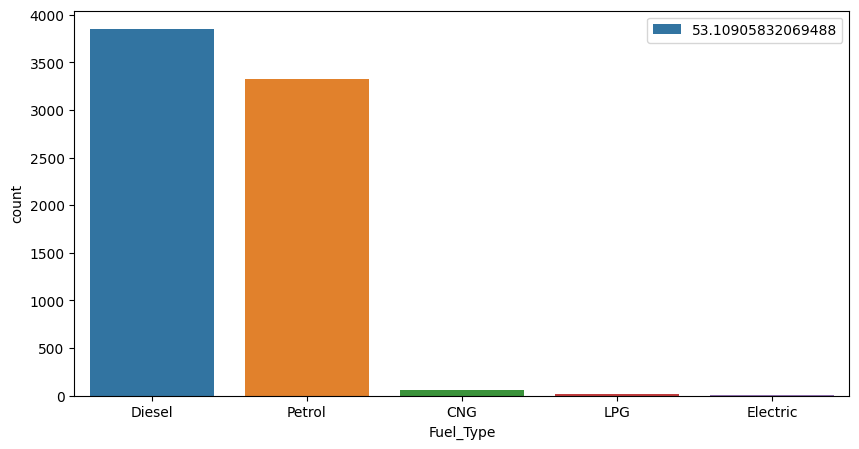

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(x='Fuel_Type',data=df,order=df['Fuel_Type'].value_counts().index)
plt.legend((df['Fuel_Type'].value_counts()/df.shape[0])*100)


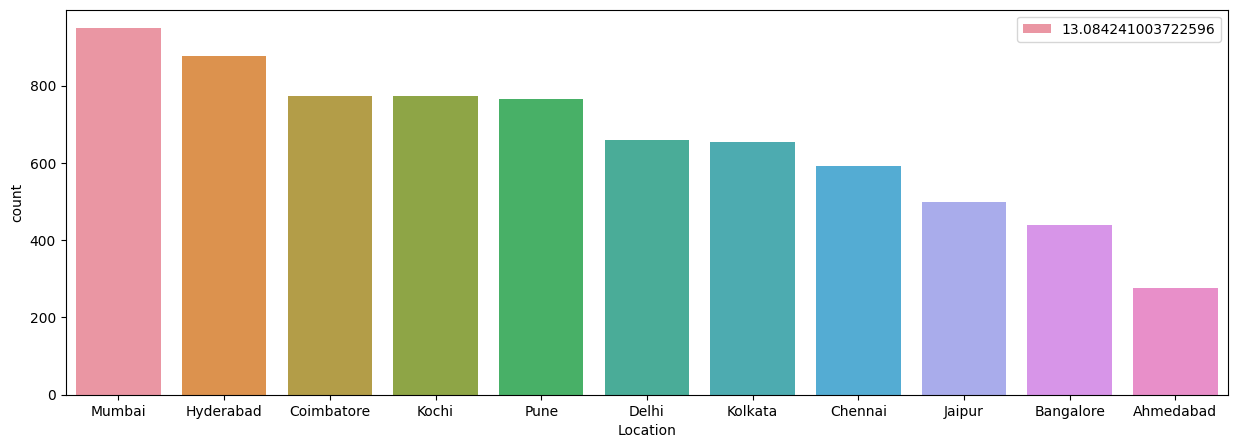

In [25]:
plt.figure(figsize=(15,5))
sns.countplot(x='Location',data=df,order=df['Location'].value_counts().index)
plt.legend((df['Location'].value_counts()/df.shape[0])*100)

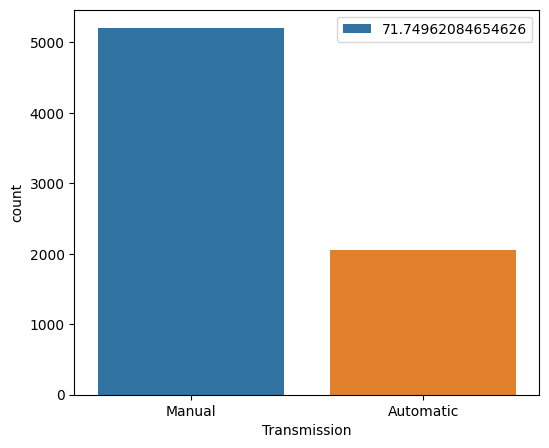

In [26]:
plt.figure(figsize=(6,5))
sns.countplot(x='Transmission',data=df,order=df['Transmission'].value_counts().index)
plt.legend((df['Transmission'].value_counts()/df.shape[0])*100)

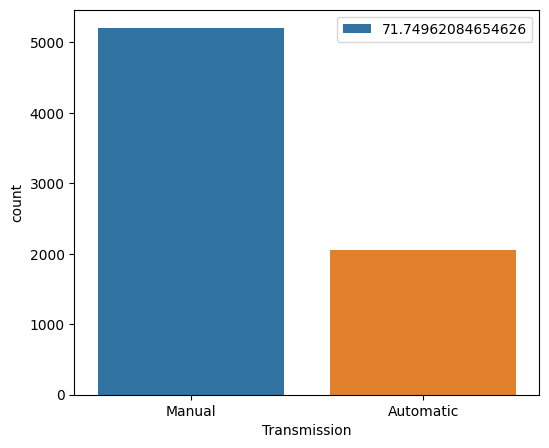

In [27]:
plt.figure(figsize=(6,5))
sns.countplot(x='Transmission',data=df,order=df['Transmission'].value_counts().index)
plt.legend((df['Transmission'].value_counts()/df.shape[0])*100)

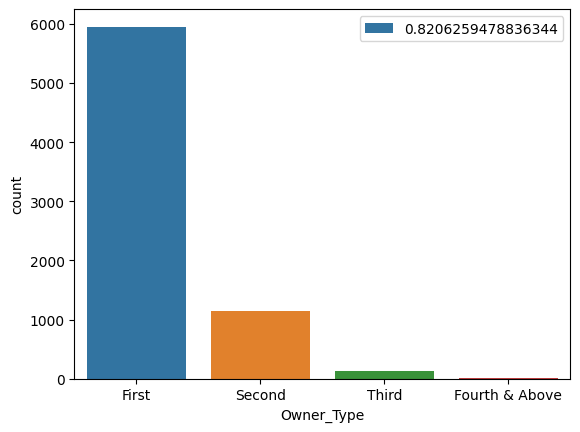

In [28]:
sns.countplot(x='Owner_Type',data=df,order=df['Owner_Type'].value_counts().index)
plt.legend(df['Owner_Type'].value_counts()/df.shape[0])

# Data Transformation
- Price and Kilometer-Driven variables are highly skewed and on a larger scale. Let’s do log transformation.



<AxesSubplot: xlabel='Kilometers_Driven', ylabel='Density'>

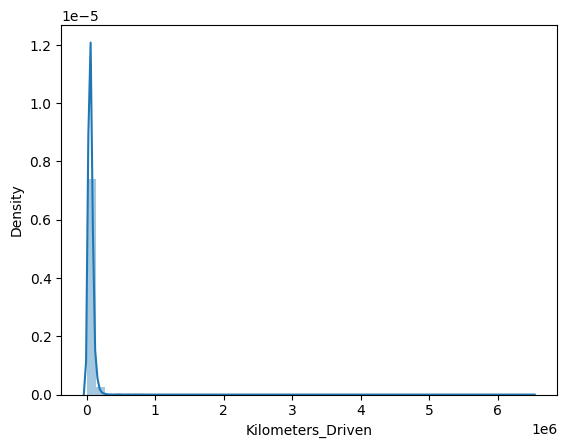

In [29]:
sns.distplot(df['Kilometers_Driven'])

<AxesSubplot: xlabel='Price', ylabel='Density'>

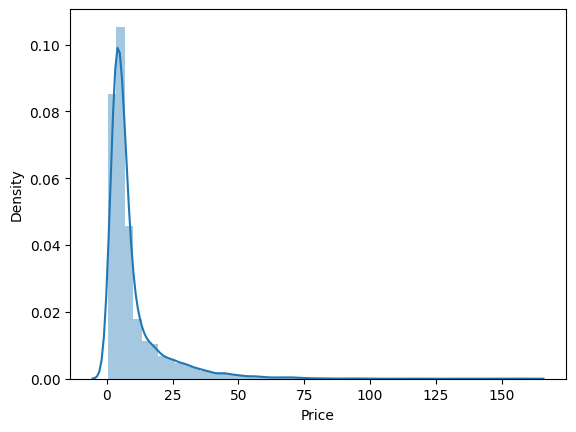

In [30]:
sns.distplot(df['Price'])

<AxesSubplot: xlabel='Kilometers_Driven', ylabel='Density'>

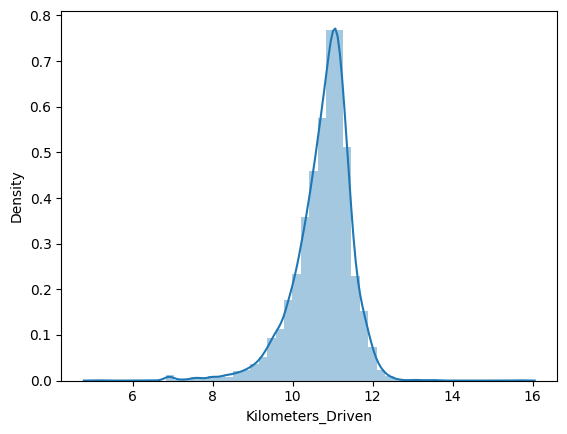

In [31]:
# Log transformation of data:
df['Kilometers_Driven']=np.log(df['Kilometers_Driven'])

sns.distplot(df['Kilometers_Driven'])

<AxesSubplot: xlabel='Price', ylabel='Density'>

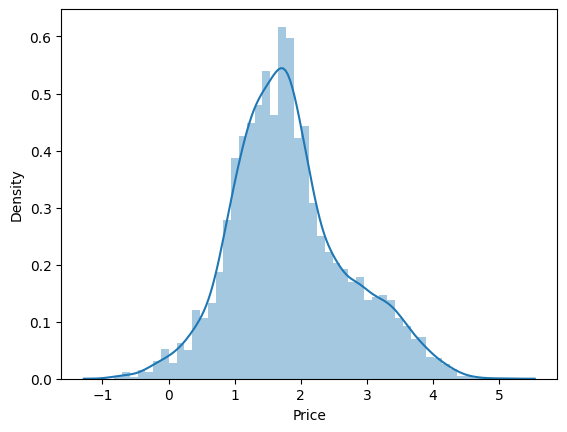

In [32]:
df['Price']=np.log(df['Price'])

sns.distplot(df['Price'])

# Bi variate analysis
- Bivariate Analysis helps to understand how variables are related to each other and the relationship between dependent and independent variables present in the dataset.

   - For Numerical variables, Pair plots and Scatter plots are widely been used to do Bivariate Analysis.

   - A Stacked bar chart can be used for categorical variables if the output variable is a classifier. Bar plots can be used if the output variable is continuous

<AxesSubplot: xlabel='Kilometers_Driven', ylabel='Price'>

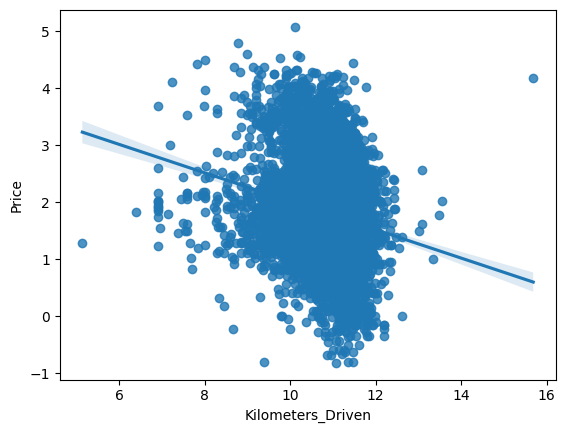

In [33]:
sns.regplot(x='Kilometers_Driven',y='Price',data=df)

<Figure size 1300x1700 with 0 Axes>

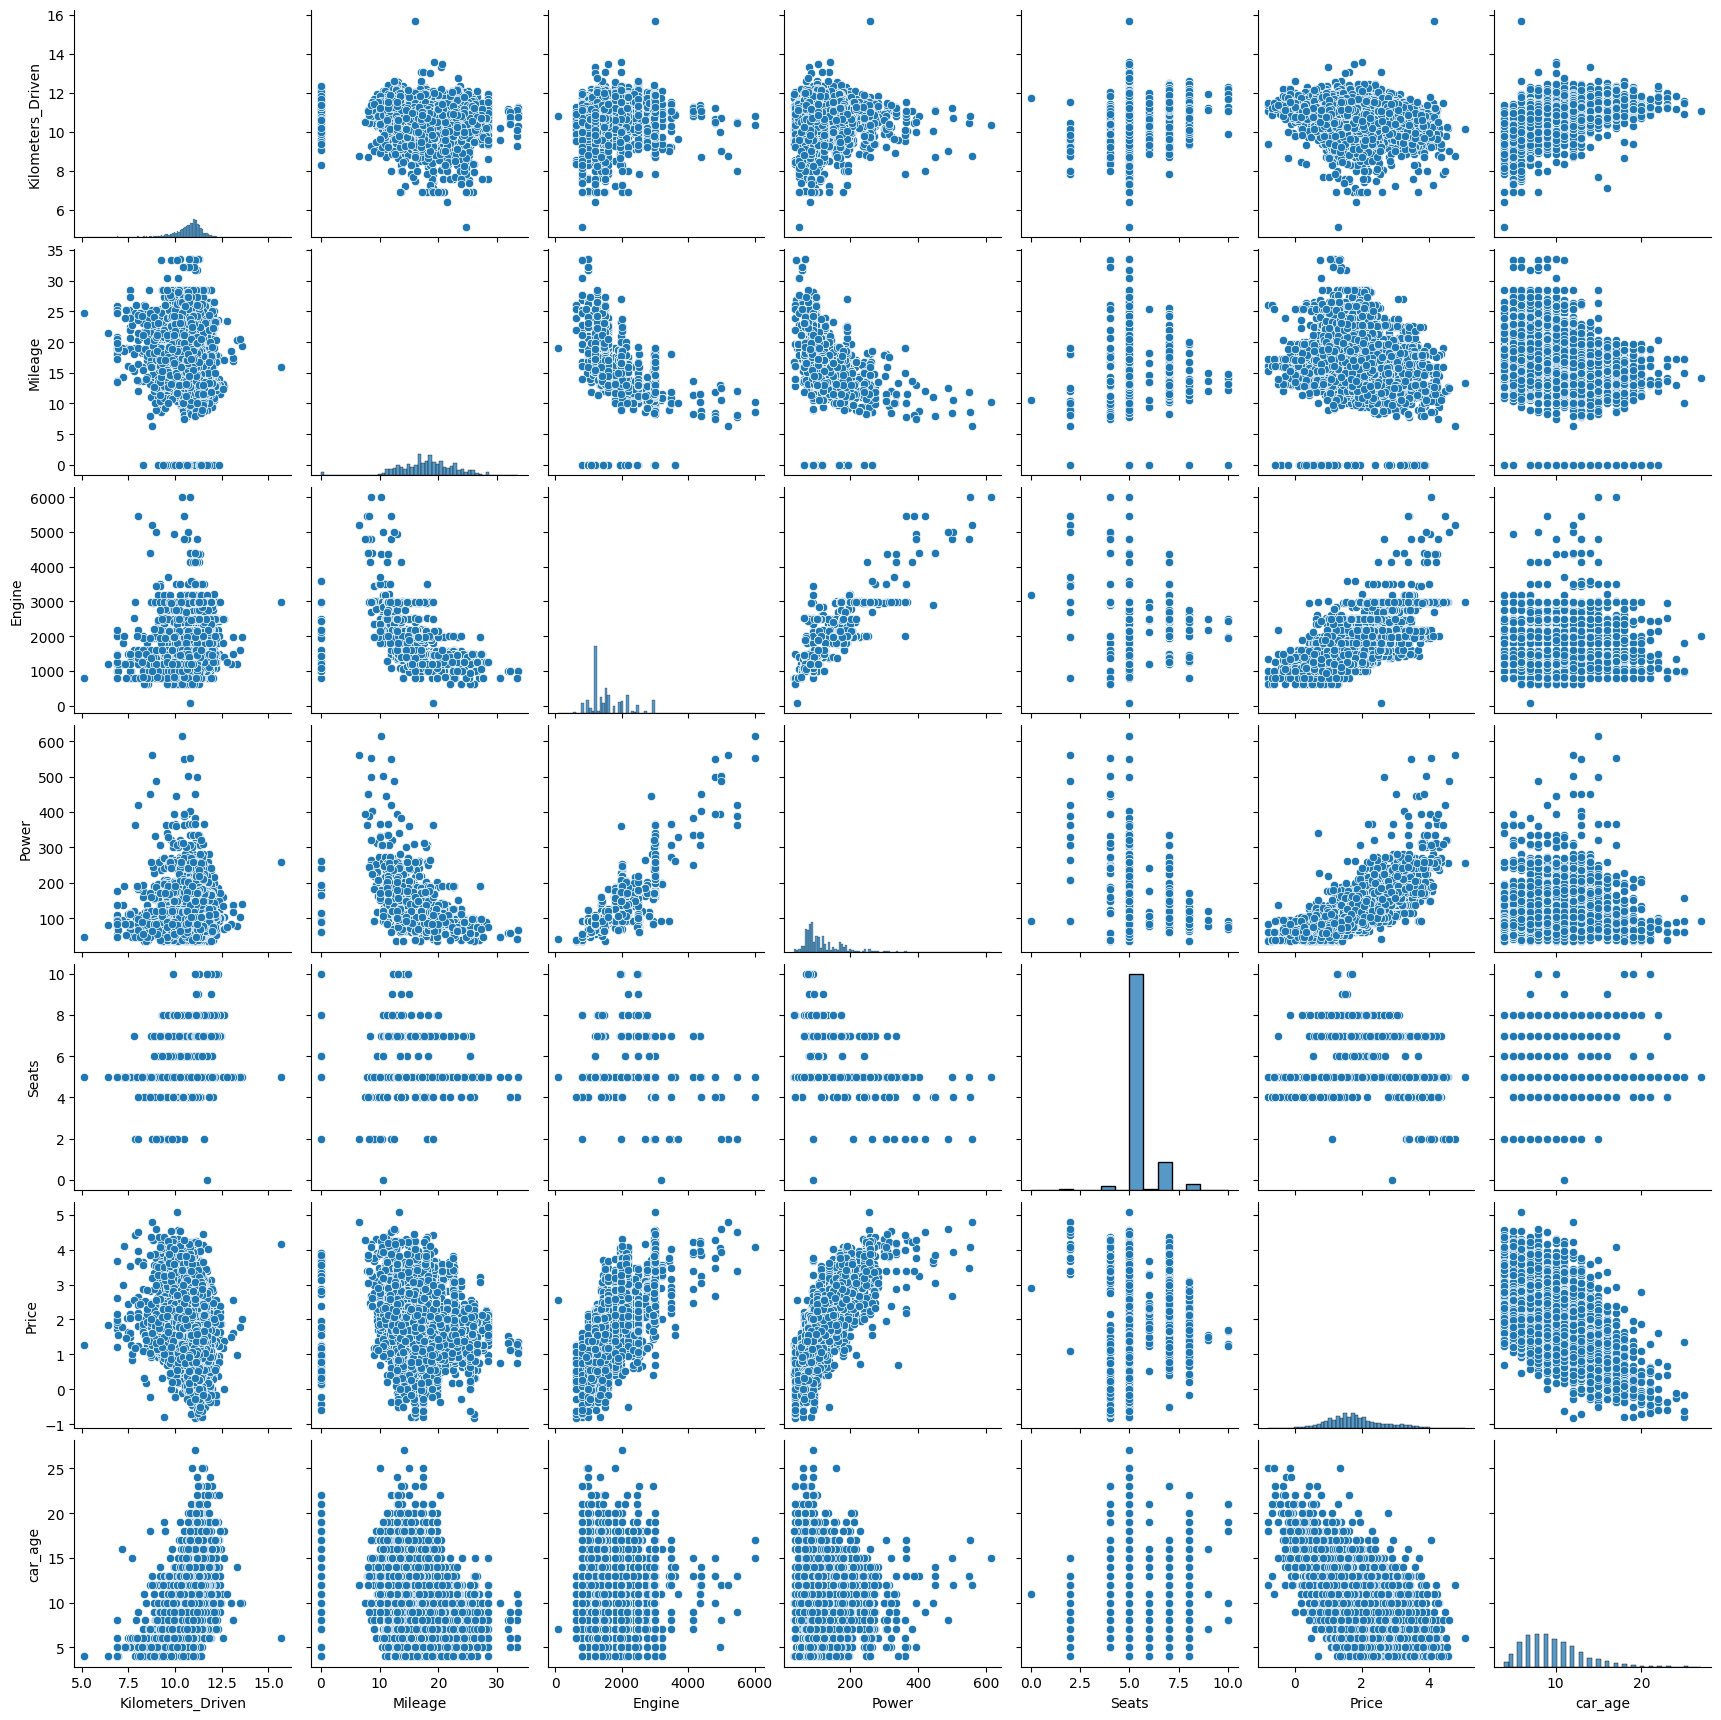

In [34]:
plt.figure(figsize=(13,17))
sns.pairplot(data=df[num_cols])

<AxesSubplot: xlabel='Location'>

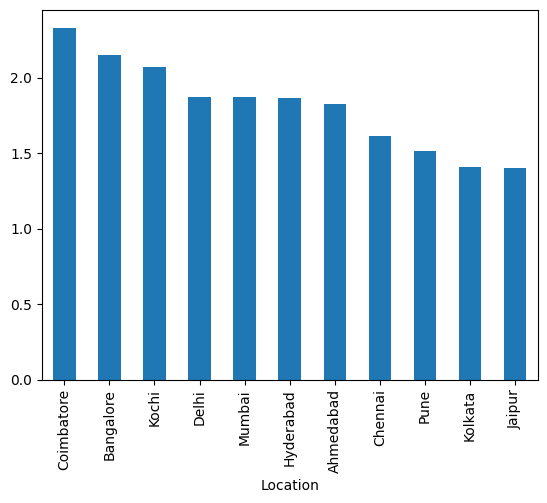

In [35]:
## FOr categorical data

df.groupby('Location')['Price'].mean().sort_values(ascending=False).plot.bar()

In [36]:
cat_cols

Index(['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Brand',
       'Model'],
      dtype='object')

<AxesSubplot: xlabel='Brand'>

<Figure size 1300x1700 with 0 Axes>

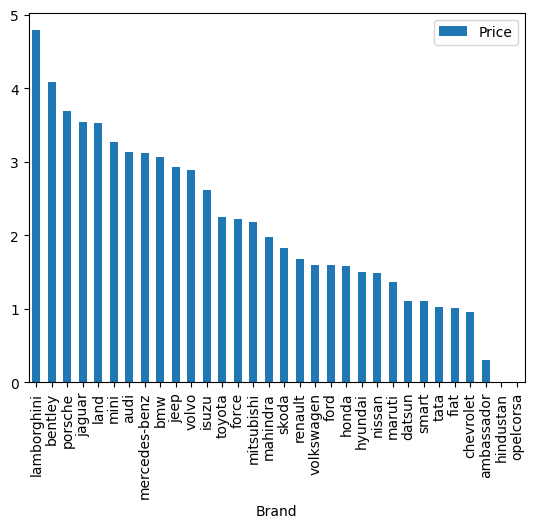

In [37]:
plt.figure(figsize=(13,17))
df.groupby('Brand').agg({'Price':'mean'}).sort_values(by='Price',ascending=False).plot.bar()

In [38]:
df['Seats']=np.where(df['Seats']==0,df['Seats'].mode()[0],df['Seats'])

<AxesSubplot: xlabel='Seats'>

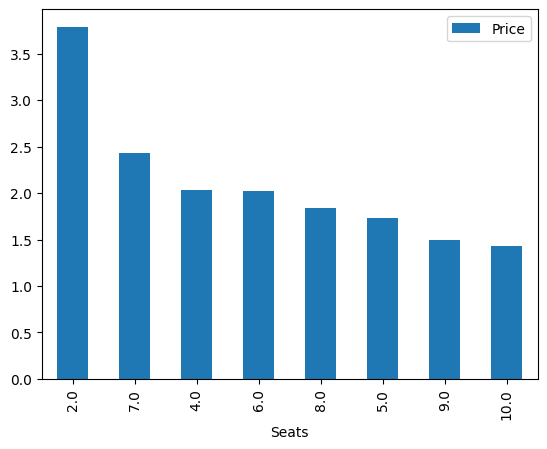

In [39]:
df.groupby('Seats').agg({'Price':'mean'}).sort_values(by='Price',ascending=False).plot.bar()

In [40]:
df['Seats'].mode()[0]

5.0

# Multi Variate Anlayis
- more than two variables. Multivariate analysis is one of the most useful methods to determine relationships and analyze patterns for any dataset.

- A heat map is widely been used for Multivariate Analysis

- Heat Map gives the correlation between the variables, whether it has a positive or negative correlation.



In [41]:
corr=df.corr()
corr

,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,car_age
Kilometers_Driven,1.000000,-0.135782,0.151860,0.013923,0.187886,-0.204300,0.500028
Mileage,-0.135782,1.000000,-0.582417,-0.489305,-0.304539,-0.255034,-0.322437
Engine,0.151860,-0.582417,1.000000,0.854701,0.402947,0.684393,0.051990
Power,0.013923,-0.489305,0.854701,1.000000,0.097988,0.759025,-0.027003
Seats,0.187886,-0.304539,0.402947,0.097988,1.000000,0.166066,-0.010522
Price,-0.204300,-0.255034,0.684393,0.759025,0.166066,1.000000,-0.504969
car_age,0.500028,-0.322437,0.051990,-0.027003,-0.010522,-0.504969,1.000000


<AxesSubplot: >

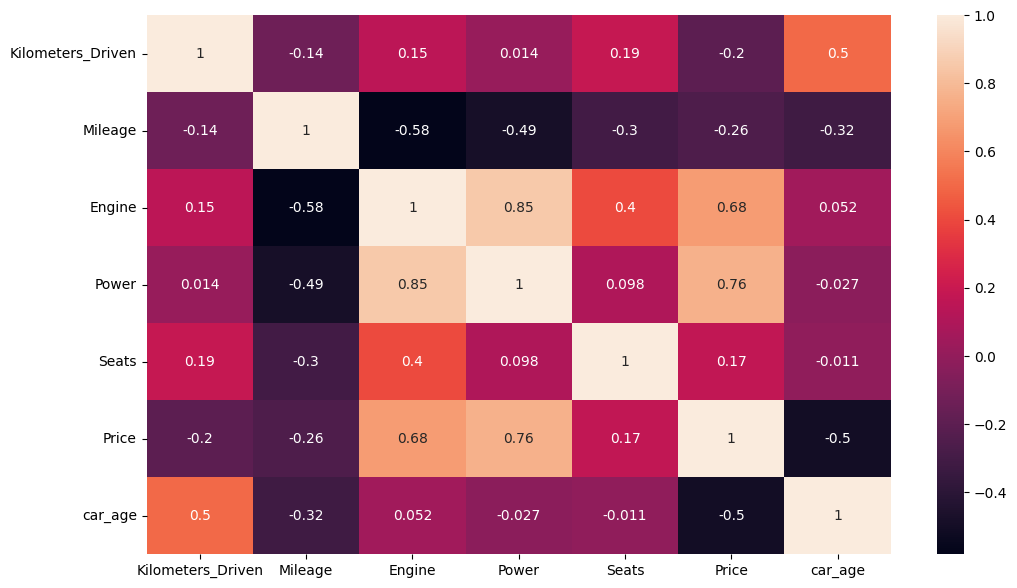

In [42]:
plt.figure(figsize=(12,7))
sns.heatmap(corr,annot=True)

### Positive correlation

<AxesSubplot: >

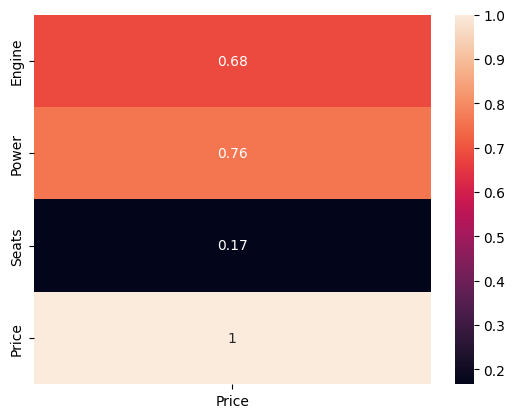

In [43]:
#finding positive correlation
sns.heatmap(pd.DataFrame(corr.Price[corr['Price']>0]),annot=True)

# Conclusion
In this article, we tried to analyze the factors influencing the used car’s price.

- Data Analysis helps to find the basic structure of the dataset.
- Dropped columns that are not adding value to our analysis.
- Performed Feature Engineering by adding some columns which contribute to our analysis.
- Data Transformations have been used to normalize the columns.

We used different visualizations for EDA like Univariate, Bi-Variate, and Multivariate Analysis.
Through EDA, we got useful insights, and below are the factors influencing the price of the car and a few takeaways

- Most of the customers prefer 2 Seat cars hence the price of the 2-seat cars is higher than other cars.
- The price of the car decreases as the Age of the car increases.
- Customers prefer to purchase the First owner rather than the Second or Third.
- Due to increased Fuel price, the customer prefers to purchase an Electric vehicle.
- Automatic Transmission is easier than Manual.

This way, we perform EDA on the datasets to explore the data and extract all possible insights, which can help in model building and better decision making.



## Data Wrangling

In [44]:
fuel=pd.get_dummies(df['Fuel_Type'],drop_first=True,prefix='Fuel_Type')
transmission=pd.get_dummies(df['Transmission'],drop_first=True,prefix='Transmission')

In [45]:
df=pd.concat([df,fuel,transmission],axis=1)
df.drop(['Fuel_Type','Transmission'],axis=1, inplace=True)
df.head(2)

,Location,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price,car_age,Brand,Model,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,Mumbai,11.184421,First,26.60,998.0,58.16,5.0,0.559616,13,maruti,wagonr,0,0,0,0,1
1,Pune,10.621327,First,19.67,1582.0,126.20,5.0,2.525729,8,hyundai,creta1.6,1,0,0,0,1


In [46]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
# Encode labels in column 'Location'
df['Location']=encoder.fit_transform(df['Location'])
df['Brand']=encoder.fit_transform(df['Brand'])
#df['Owner_Type']=encoder.fit_transform(df['Owner_Type'])
df.head()

,Location,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price,car_age,Brand,Model,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,9,11.184421,First,26.60,998.0,58.16,5.0,0.559616,13,18,wagonr,0,0,0,0,1
1,10,10.621327,First,19.67,1582.0,126.20,5.0,2.525729,8,11,creta1.6,1,0,0,0,1
2,2,10.736397,First,18.20,1199.0,88.70,5.0,1.504077,12,10,jazzv,0,0,0,1,1
3,2,11.373663,First,20.77,1248.0,88.76,7.0,1.791759,11,18,ertigavdi,1,0,0,0,1
4,3,10.613246,Second,15.20,1968.0,140.80,5.0,2.875822,10,1,a4new,1,0,0,0,0


In [47]:
df['Owner_Type'].replace({'First':4,'Second':3,'Third':2,'Fourth & Above':1},inplace=True)

# Dropping Model
df.drop('Model',axis=1,inplace=True)

df.head()

,Location,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price,car_age,Brand,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,9,11.184421,4,26.60,998.0,58.16,5.0,0.559616,13,18,0,0,0,0,1
1,10,10.621327,4,19.67,1582.0,126.20,5.0,2.525729,8,11,1,0,0,0,1
2,2,10.736397,4,18.20,1199.0,88.70,5.0,1.504077,12,10,0,0,0,1,1
3,2,11.373663,4,20.77,1248.0,88.76,7.0,1.791759,11,18,1,0,0,0,1
4,3,10.613246,3,15.20,1968.0,140.80,5.0,2.875822,10,1,1,0,0,0,0


In [48]:
# Removing Nan values
df=df[df['Price'].notnull()]
df.head(1)

,Location,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price,car_age,Brand,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,9,11.184421,4,26.6,998.0,58.16,5.0,0.559616,13,18,0,0,0,0,1


In [70]:
# Removing price==0
df=df[df['Price']!=0]



# Bulding the Model

### Making independet and dependet variables

In [71]:
X=df.drop('Price',axis=1)
y=df['Price']#[df['Price'].notnull()]

## Splitting the data

In [72]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

## Standrization of data

In [73]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_sc=sc.fit_transform(X_train)

#TEst data
X_test_sc=sc.transform(X_test)

In [74]:
# LR
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train_sc,y_train)

LinearRegression()

In [75]:
# Prediction
y_pred=lr.predict(X_test_sc)

df_final=pd.DataFrame()
df_final['Actual']=y_test
df_final['Predicted']=y_pred
df_final.head()

,Actual,Predicted
4332,1.677097,1.924246
1365,0.470004,1.145047
3787,2.658860,2.568363
473,3.940222,3.132706
1374,1.871802,2.013301


In [78]:
# Evaluating the model performance
from sklearn.metrics import mean_squared_error,r2_score
print('MSE:', mean_squared_error(y_test,y_pred))
print('r2:', r2_score(y_test,y_pred))
print("Mape",np.mean(abs(((y_test-y_pred)/y_test)*100)))


MSE: 0.09465247087165428
r2: 0.8726946444298619
Mape 21.771178297074826


In [55]:
df_final=df_final.reset_index()
df_final.head()

,index,Actual,Predicted
0,5150,1.981001,2.258218
1,2164,1.446919,1.236138
2,1136,1.360977,1.258632
3,5641,2.129421,2.703066
4,1515,2.601207,2.489937
